# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.121723e+01     7.780551e+00
 * time: 0.0037031173706054688
     1     2.961729e+01     5.487764e+00
 * time: 0.01711297035217285
     2     2.169288e+01     6.423376e+00
 * time: 0.03389406204223633
     3     1.699522e+01     6.904788e+00
 * time: 0.05069112777709961
     4     1.347513e+01     3.530221e+00
 * time: 0.06742501258850098
     5     1.044055e+01     1.310387e+00
 * time: 0.08427906036376953
     6     9.635412e+00     1.930007e+00
 * time: 0.09802103042602539
     7     9.132351e+00     9.547155e-01
 * time: 0.11175394058227539
     8     8.793178e+00     8.189568e-01
 * time: 0.12535905838012695
     9     8.564197e+00     9.047396e-01
 * time: 0.13937902450561523
    10     8.351535e+00     6.074179e-01
 * time: 0.15361595153808594
    11     8.214657e+00     5.787883e-01
 * time: 0.1680150032043457
    12     8.135321e+00     5.332841e-01
 * time: 0.18238496780395508
    13     8.052481e+00     4.098683e-01
 * time

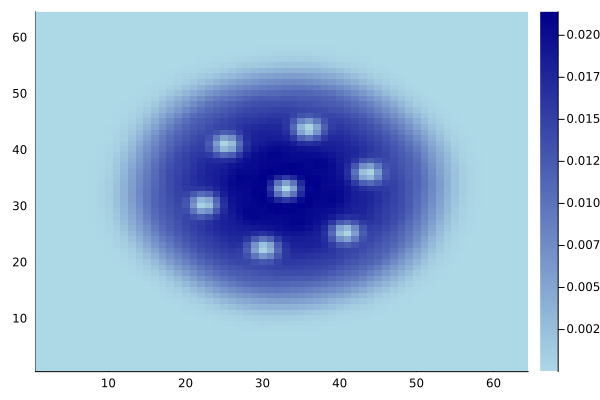

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)